In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## CNN의 기본

### Toy image

(1, 3, 3, 1) - 1번째 : n개의 이미지, 2번째 & 3번째 : size, 4번째 : color 수

(1, 3, 3, 1)


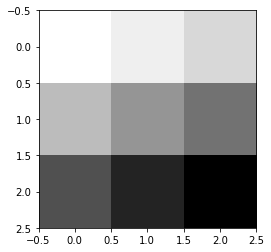

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]], 
                  [[4], [5], [6]], 
                  [[7], [8], [9]]]], dtype=np.float32)
print(image.shape) # size of image (1, 3, 3, 1)
plt.imshow(image.reshape(3, 3), cmap='Greys')
plt.show()

## 1 Filter (2, 2, 1, 1) with padding: VALID

필터의 (2, 2, 1, 1) - 1번째 & 2번째 : size, 3번째 : color, 4번째 : 필터의 수

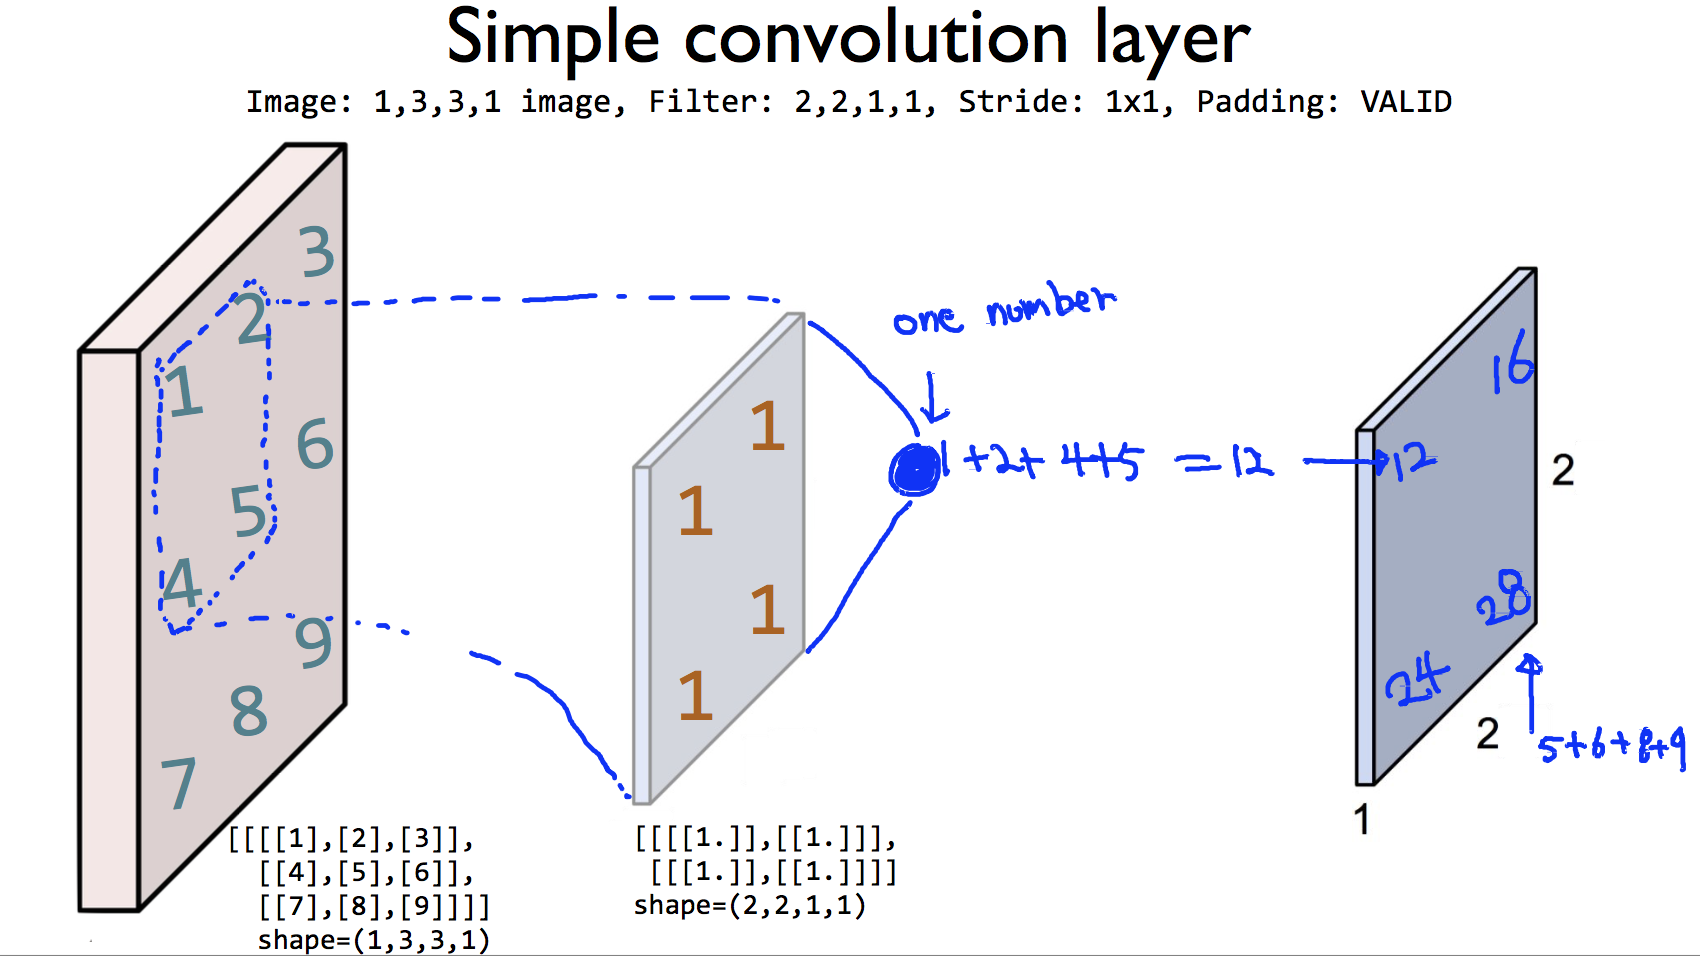

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


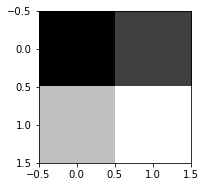

In [3]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1., 1., 1., 1.], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2, 2), cmap='gray')
plt.show()

## 1 filter (2, 2, 1, 1) with padding: SAME

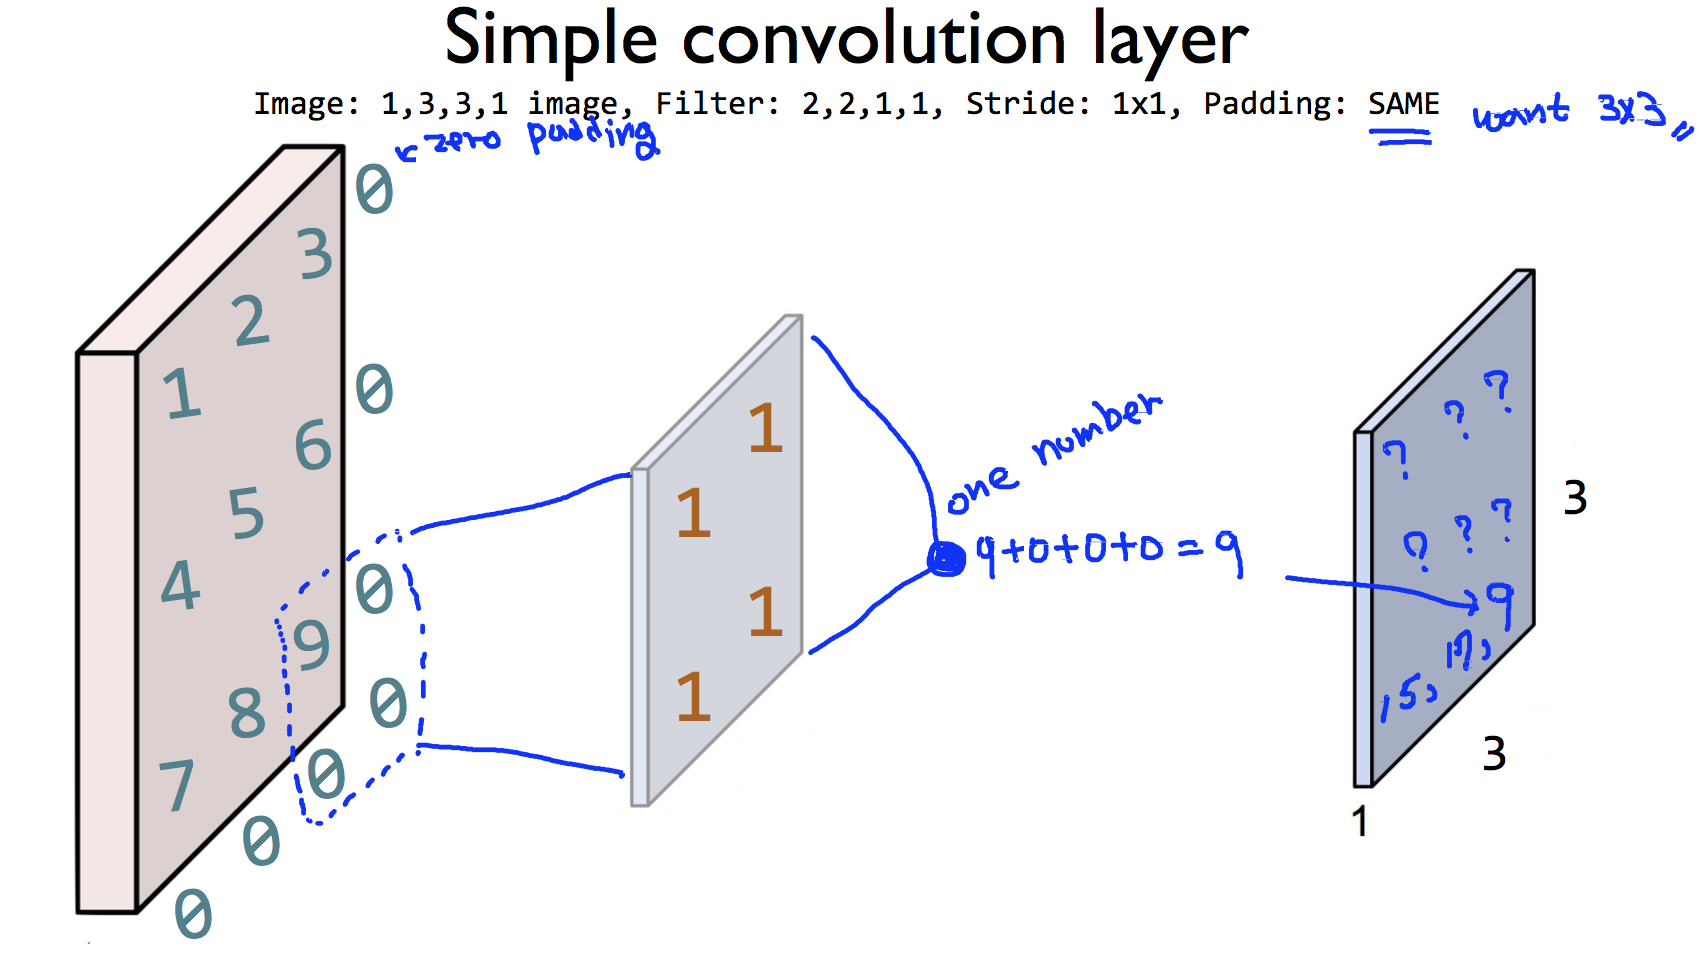

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


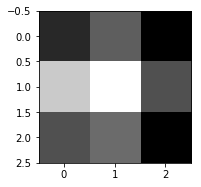

In [4]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')
plt.show()

## 3 filters (2, 2, 1, 3)

In [5]:
print("image.shape", image.shape)

weight = tf.constant([[[[1., 10., -1.]], [[1., 10., -1.]]],
                      [[[1., 10., -1.]], [[1., 10., -1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


## MAX POOLING

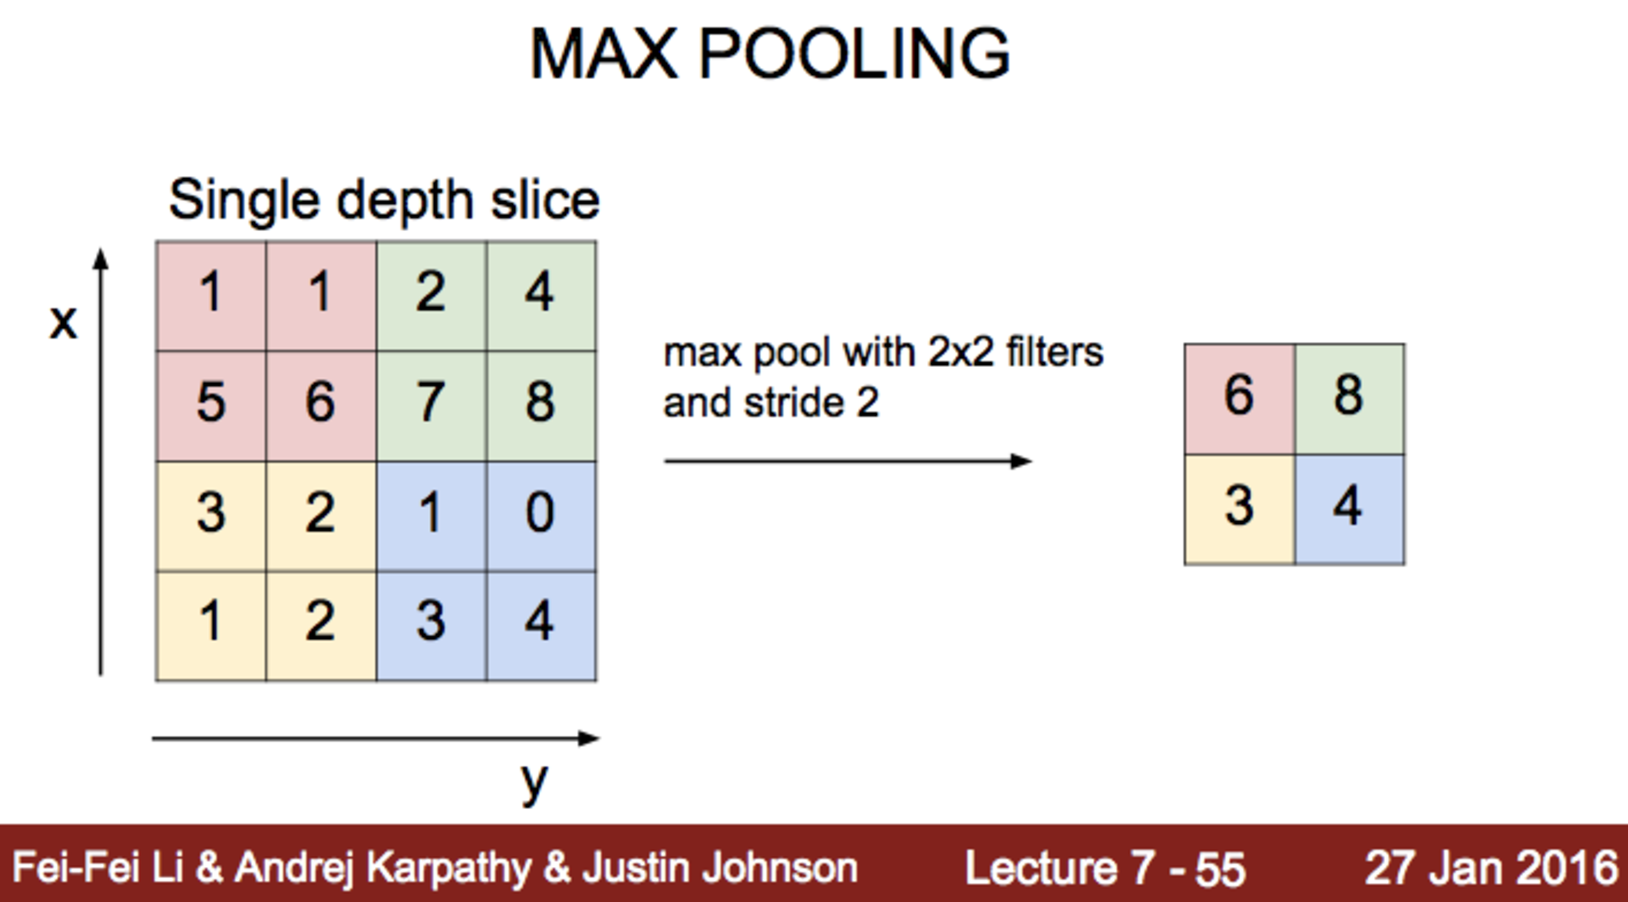

In [6]:
image = np.array([[[[4], [3]],
                   [[2], [1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                     strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[ 4.]]]]


## SAME: Zero paddings

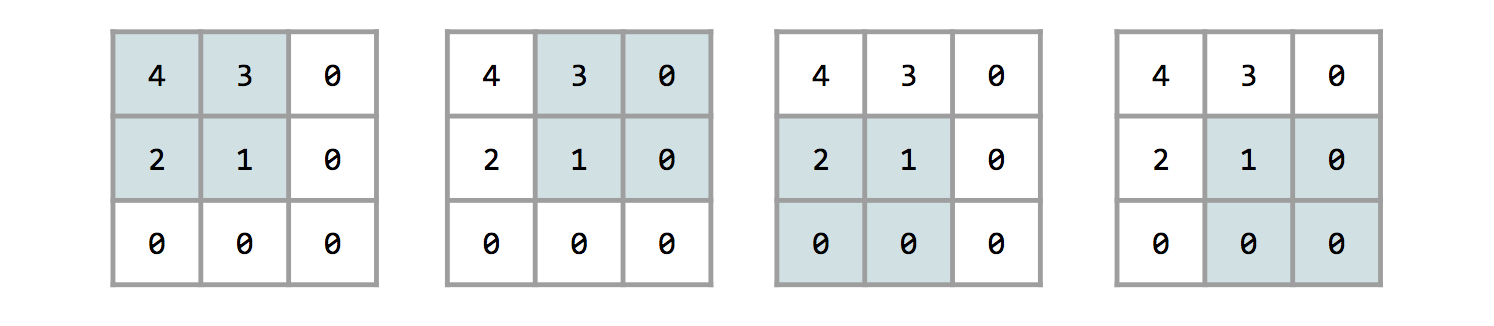

In [7]:
image = np.array([[[[4], [3]],
                   [[2], [1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], 
                     strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


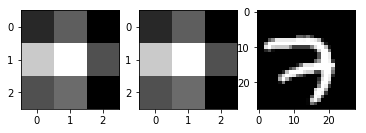

In [9]:
img = mnist.train.images[0].reshape(28, 28)
show = plt.imshow(img, cmap='gray')
plt.show(show)

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


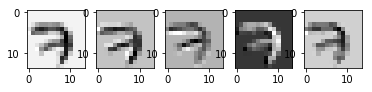

In [10]:
sess = tf.InteractiveSession()

img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')
plt.show()

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


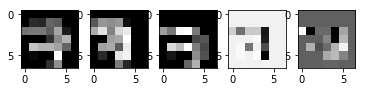

In [11]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], 
                      strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')
plt.show()